<a href="https://colab.research.google.com/github/dataexpert-moon/class_ai4dl/blob/demo-repo/week3/%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%A3%BC%EC%B0%A8_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# 3 Page

# 1.

import tensorflow as tf

# Define the variables and the function
x = tf.Variable(2.0, dtype=tf.float32)
y = tf.Variable(1.0, dtype=tf.float32)


# Compute the partial derivatives of f with respect to x and y using tf.GradientTape()
with tf.GradientTape() as tape:
    f = x**2*y + x*y + 3*y

df_dx, df_dy = tape.gradient(f, [x, y])
print(df_dx, df_dy) 
# x에 대한 편미분 값은 5.0
# y에 대한 편미분 값은 7.0
    

tf.Tensor(5.0, shape=(), dtype=float32) tf.Tensor(9.0, shape=(), dtype=float32)


In [57]:
# 2.
import numpy as np

x = tf.constant(np.array([1.,4.,3.]).reshape(1, 3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3, 2)), dtype = tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype = tf.float32)


In [59]:
# 3. 

with tf.GradientTape() as tape:
    tape.watch(W)
    tape.watch(b)
    f = tf.pow(tf.matmul(x, W) + b, 3) # matrix_multiple의 약자

df_dW, df_db = tape.gradient(f, [W,b])

print("W derivate\n")
print(df_dW)

print("b derivate\n")
print(df_db)



W derivate

tf.Tensor(
[[ 51.008057  67.9415  ]
 [204.03223  271.766   ]
 [153.02417  203.8245  ]], shape=(3, 2), dtype=float32)
b derivate

tf.Tensor([51.008057 67.9415  ], shape=(2,), dtype=float32)


<ipython-input-47-6953b2437dd4>:5: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples = np.random.multivariate_normal( mean = [2, 3], cov = [[1, 0.2], [0.5, 1]], size = num_samples_per_class)


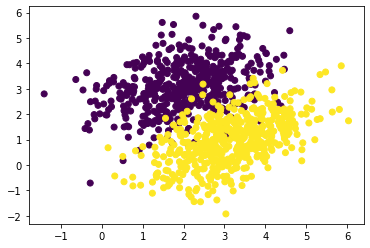

Loss at step 0: 3.3063
Loss at step 1: 0.4473
Loss at step 2: 0.1704
Loss at step 3: 0.1370
Loss at step 4: 0.1286
Loss at step 5: 0.1241
Loss at step 6: 0.1210
Loss at step 7: 0.1187
Loss at step 8: 0.1169
Loss at step 9: 0.1154
Loss at step 10: 0.1142
Loss at step 11: 0.1131
Loss at step 12: 0.1122
Loss at step 13: 0.1113
Loss at step 14: 0.1105
Loss at step 15: 0.1097
Loss at step 16: 0.1089
Loss at step 17: 0.1082
Loss at step 18: 0.1075
Loss at step 19: 0.1068
Loss at step 20: 0.1061
Loss at step 21: 0.1055
Loss at step 22: 0.1048
Loss at step 23: 0.1042
Loss at step 24: 0.1036
Loss at step 25: 0.1030
Loss at step 26: 0.1024
Loss at step 27: 0.1018
Loss at step 28: 0.1013
Loss at step 29: 0.1007
Loss at step 30: 0.1002
Loss at step 31: 0.0996
Loss at step 32: 0.0991
Loss at step 33: 0.0986
Loss at step 34: 0.0981
Loss at step 35: 0.0976
Loss at step 36: 0.0972
Loss at step 37: 0.0967
Loss at step 38: 0.0963
Loss at step 39: 0.0958


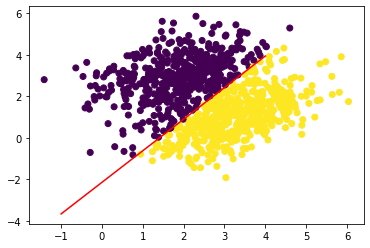

In [47]:
#4 Page
# 1.

num_samples_per_class = 500
negative_samples = np.random.multivariate_normal( mean = [2, 3], cov = [[1, 0.2], [0.5, 1]], size = num_samples_per_class)
positive_samples = np.random.multivariate_normal( mean = [3, 1], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)


inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))


import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)


learning_rate = 0.05

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)

x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [49]:
# 5 page
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 2s 27ms/step - loss: 0.2598 - binary_accuracy: 0.7586 - val_loss: 0.2684 - val_binary_accuracy: 0.6567
Epoch 2/5
44/44 [==============================] - 1s 13ms/step - loss: 0.1410 - binary_accuracy: 0.8514 - val_loss: 0.3418 - val_binary_accuracy: 0.6000
Epoch 3/5
44/44 [==============================] - 1s 14ms/step - loss: 0.1742 - binary_accuracy: 0.8057 - val_loss: 0.0906 - val_binary_accuracy: 0.9267
Epoch 4/5
44/44 [==============================] - 0s 8ms/step - loss: 0.1748 - binary_accuracy: 0.8229 - val_loss: 0.1071 - val_binary_accuracy: 0.9000
Epoch 5/5
44/44 [==============================] - 0s 5ms/step - loss: 0.1555 - binary_accuracy: 0.8214 - val_loss: 0.2461 - val_binary_accuracy: 0.6967
